# Model
In this notebook we'll put together the ideas for building a model for training our voice embeddings.

## Audio Trigger Model
Here's the model I used in a class assignment building a model for detetecting a trigger word ("activate") from audio samples. This model was used to monitor an audio channel for the trigger word, and output $\hat{y}$ at each time step with 1 if the trigger word had just finished being spoken, and 0 otherwise.
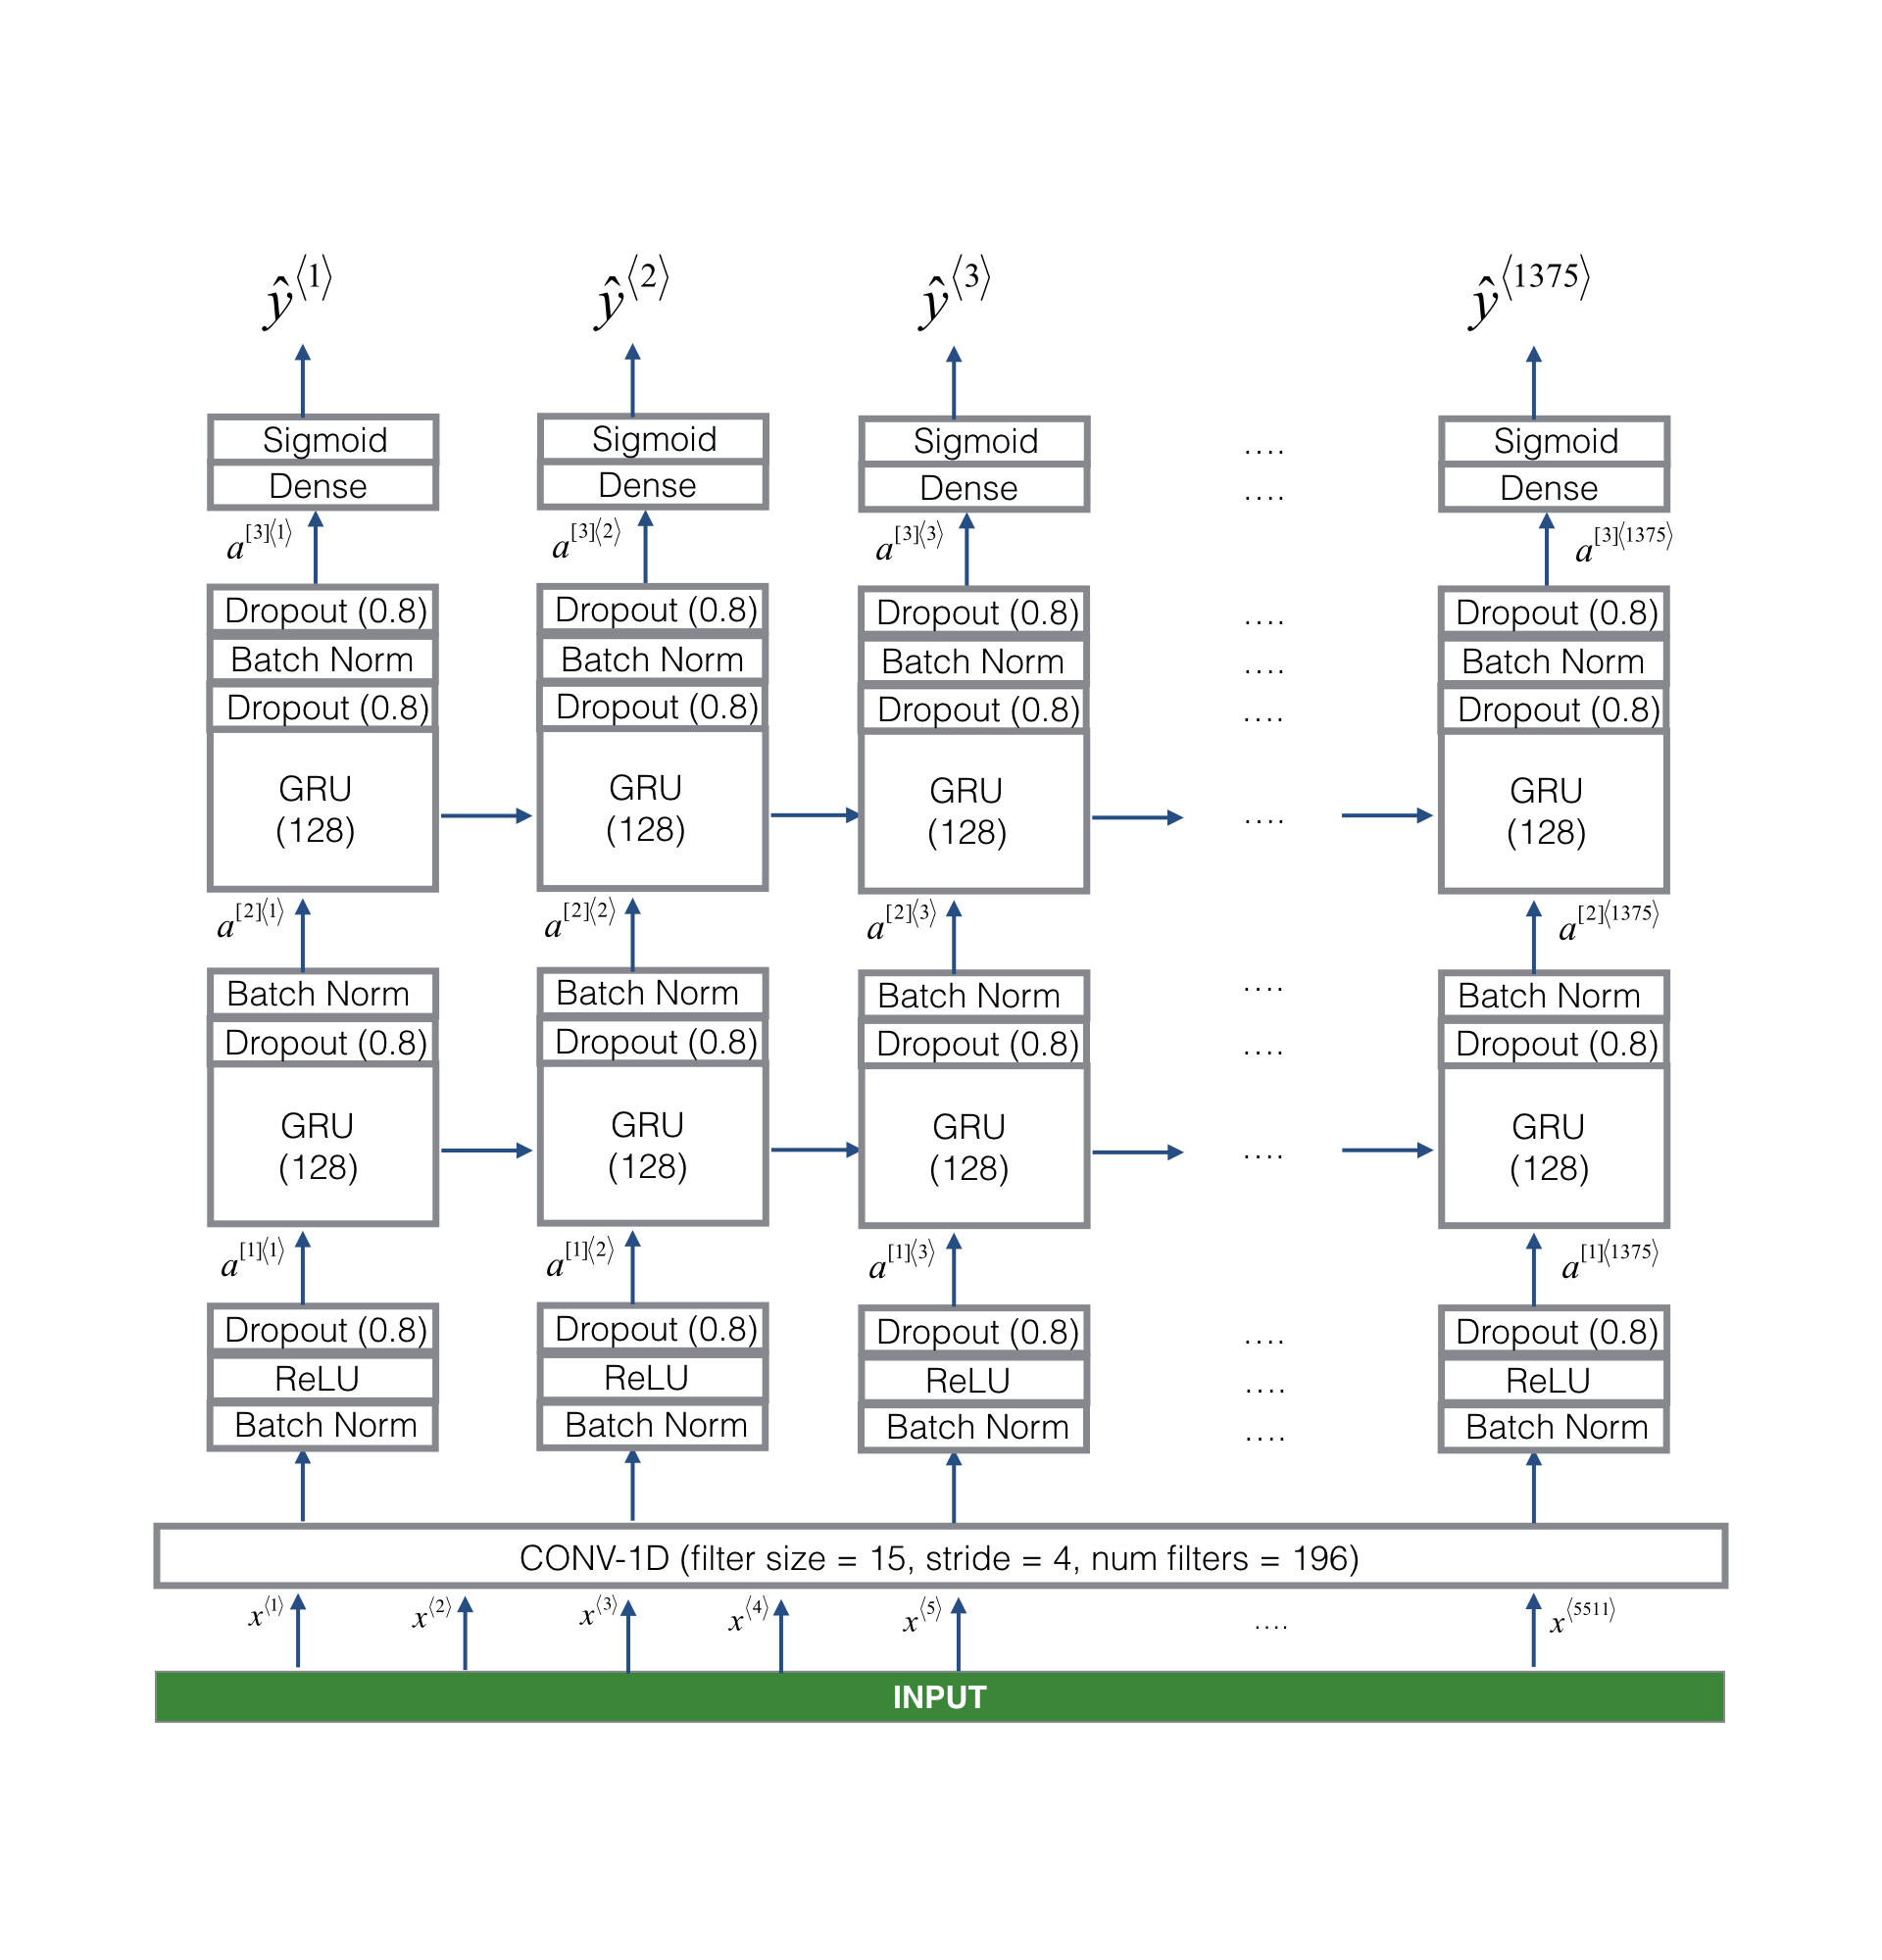

We won't use this exact model.  This is because the $\hat{y}$ predictions in that model were one per time step.

Instead what we want is a single $\hat{y}$ of shape ${n}$ where ${n}$ is the length of the desired word embedding.

## Model
Here is the model we'll use for producing an embedding for an audio clip:



## Resources
 * Architecture diagram drawn with draw.io
 * Trigger Word Network architecture from Course 4 (sequential nets) week 4 Deep Learning Specialization, Sequential Models, Deep Learning.ai, Coursera

## Triplet Loss on Images

For an image $x$, we denote its encoding $f(x)$, where $f$ is the function computed by the neural network.

<!--
We will also add a normalization step at the end of our model so that $\mid \mid f(x) \mid \mid_2 = 1$ (means the vector of encoding should be of norm 1).
!-->

Training will use triplets of images $(A, P, N)$:  

- A is an "Anchor" image--a picture of a person. 
- P is a "Positive" image--a picture of the same person as the Anchor image.
- N is a "Negative" image--a picture of a different person than the Anchor image.

These triplets are picked from our training dataset. We will write $(A^{(i)}, P^{(i)}, N^{(i)})$ to denote the $i$-th training example. 

You'd like to make sure that an image $A^{(i)}$ of an individual is closer to the Positive $P^{(i)}$ than to the Negative image $N^{(i)}$) by at least a margin $\alpha$:

$$\mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2 + \alpha < \mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2$$

You would thus like to minimize the following "triplet cost":

$$\mathcal{J} = \sum^{m}_{i=1} \large[ \small \underbrace{\mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2}_\text{(1)} - \underbrace{\mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2}_\text{(2)} + \alpha \large ] \small_+ \tag{3}$$

Here, we are using the notation "$[z]_+$" to denote $max(z,0)$.  

Notes:
- The term (1) is the squared distance between the anchor "A" and the positive "P" for a given triplet; you want this to be small. 
- The term (2) is the squared distance between the anchor "A" and the negative "N" for a given triplet, you want this to be relatively large. It has a minus sign preceding it because minimizing the negative of the term is the same as maximizing that term.
- $\alpha$ is called the margin. It is a hyperparameter that you pick manually. We will use $\alpha = 0.2$. 

Most implementations also rescale the encoding vectors to haven L2 norm equal to one (i.e., $\mid \mid f(img)\mid \mid_2$=1); you won't have to worry about that in this assignment.

**Exercise**: Implement the triplet loss as defined by formula (3). Here are the 4 steps:
1. Compute the distance between the encodings of "anchor" and "positive": $\mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2$
2. Compute the distance between the encodings of "anchor" and "negative": $\mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2$
3. Compute the formula per training example: $ \mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2 - \mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2 + \alpha$
3. Compute the full formula by taking the max with zero and summing over the training examples:
$$\mathcal{J} = \sum^{m}_{i=1} \large[ \small \mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2 - \mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2+ \alpha \large ] \small_+ \tag{3}$$

#### Hints
* Useful functions: `tf.reduce_sum()`, `tf.square()`, `tf.subtract()`, `tf.add()`, `tf.maximum()`.
* For steps 1 and 2, you will sum over the entries of $\mid \mid f(A^{(i)}) - f(P^{(i)}) \mid \mid_2^2$ and $\mid \mid f(A^{(i)}) - f(N^{(i)}) \mid \mid_2^2$.  
* For step 4 you will sum over the training examples.

#### Additional Hints
* Recall that the square of the L2 norm is the sum of the squared differences: $||x - y||_{2}^{2} = \sum_{i=1}^{N}(x_{i} - y_{i})^{2}$
* Note that the `anchor`, `positive` and `negative` encodings are of shape `(m,128)`, where m is the number of training examples and 128 is the number of elements used to encode a single example.
* For steps 1 and 2, you will maintain the number of `m` training examples and sum along the 128 values of each encoding. 
[tf.reduce_sum](https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum) has an `axis` parameter.  This chooses along which axis the sums are applied.  
* Note that one way to choose the last axis in a tensor is to use negative indexing (`axis=-1`).
* In step 4, when summing over training examples, the result will be a single scalar value.
* For `tf.reduce_sum` to sum across all axes, keep the default value `axis=None`.